In [3]:
library("data.table")
library("tidyverse")
library("cowplot")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()     masks data.table::between()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::first()       masks data.table::first()
✖ lubridate::hour()    masks data.table::hour()
✖ lubridate::isoweek() masks data.table::isoweek()
✖ dplyr::lag()         masks stats::lag()
✖ dplyr::last()        masks data.table::last()
✖ lubridate::mday()    masks data.table::mday()
✖ lubridate::minute()  masks data.table::minute()
✖ lubridate::month()   masks data.table::month()
✖ lubridate::quarter() masks data.table::quarter()
✖ lubridate::second()  masks data.table::second()
✖ purrr::transpose()   masks data.table::transpose()
✖ lubridate::wday() 

In [4]:
df_raw <- fread("/nfs/research/birney/users/saul/nextflow/medaka_behaviour_pilot/concordance_kruskal_wallis_combined.csv.gz")
head(df_raw)

time_step,n_states,concordance_A,concordance_B,hmm_state,chisq,df,pval
<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>
0.05,5,0.8079861,0.8072979,1,135.05652,4,3.226402e-28
0.05,5,0.8079861,0.8072979,4,60.62978,4,2.138754e-12
0.05,5,0.8079861,0.8072979,0,91.97435,4,5.011910e-19
0.05,5,0.8079861,0.8072979,3,29.84926,4,5.252739e-06
0.05,5,0.8079861,0.8072979,2,10.38889,4,3.436247e-02
0.05,10,0.7540975,0.8244771,3,138.90746,4,4.836511e-29


In [5]:
df_raw[, sort(unique(time_step))]

[1] 0.05 0.08 0.10 0.15 0.20 0.30 0.50 1.00

In [6]:
df_raw[, sort(unique(n_states))]

[1]  5 10 12 14 15 16 17 18 20

In [7]:
df <- df_raw[
    , .(
        concordance = mean(c(unique(concordance_A), unique(concordance_B))),
        kw_sum_chisq = sum(chisq)
    ),
    by = c("time_step", "n_states")
]
head(df)

time_step,n_states,concordance,kw_sum_chisq
<dbl>,<int>,<dbl>,<dbl>
0.05,5,0.8076420,327.8988
0.05,10,0.7892873,603.3887
0.05,12,0.5854449,734.7791
0.05,14,0.5923647,760.9037
0.05,15,0.5508861,732.5177
0.05,16,0.6207291,836.9291


In [8]:
df[time_step == 0.08 & n_states == 15]

time_step,n_states,concordance,kw_sum_chisq
<dbl>,<int>,<dbl>,<dbl>
0.08,15,0.67572,831.7939


In [9]:
df[kw_sum_chisq > 500 & concordance > 0.8]

time_step,n_states,concordance,kw_sum_chisq
<dbl>,<int>,<dbl>,<dbl>
0.2,15,0.9462715,714.058


In [9]:
p <- ggplot(df, aes(x = concordance, y = kw_sum_chisq, fill = as.factor(n_states), size = time_step)) +
    geom_point(color = "black", pch = 21) +
    geom_point(
        data = df[time_step == 0.08 & n_states == 15],
        size = 10,
        shape = 1,
        color = "red",
        stroke = 2,
        show.legend = FALSE
    ) +
    annotate(geom = "text", x = 0.67572, y = 831.7939, label = "15 states, 0.08 seconds", hjust = -0.1, vjust = -1.5, size = 5) +
    scale_size_continuous(breaks = c(0.05, 0.08, 0.1, 0.15, 0.2, 0.3, 0.5, 1)) +
    theme_cowplot(18) +
    scale_fill_brewer(palette = "RdBu") +
    labs(
        x = "Mean concordance",
        y = bquote("Summed Kruskal-Wallis"~chi^2),
        fill = "Number of\nHMM states",
        size = "Interval\n(seconds)"
    ) +
    guides(size = guide_legend(order = 2), fill = guide_legend(override.aes = list(size = 4), order = 1)) +
    theme(legend.box = "horizontal")

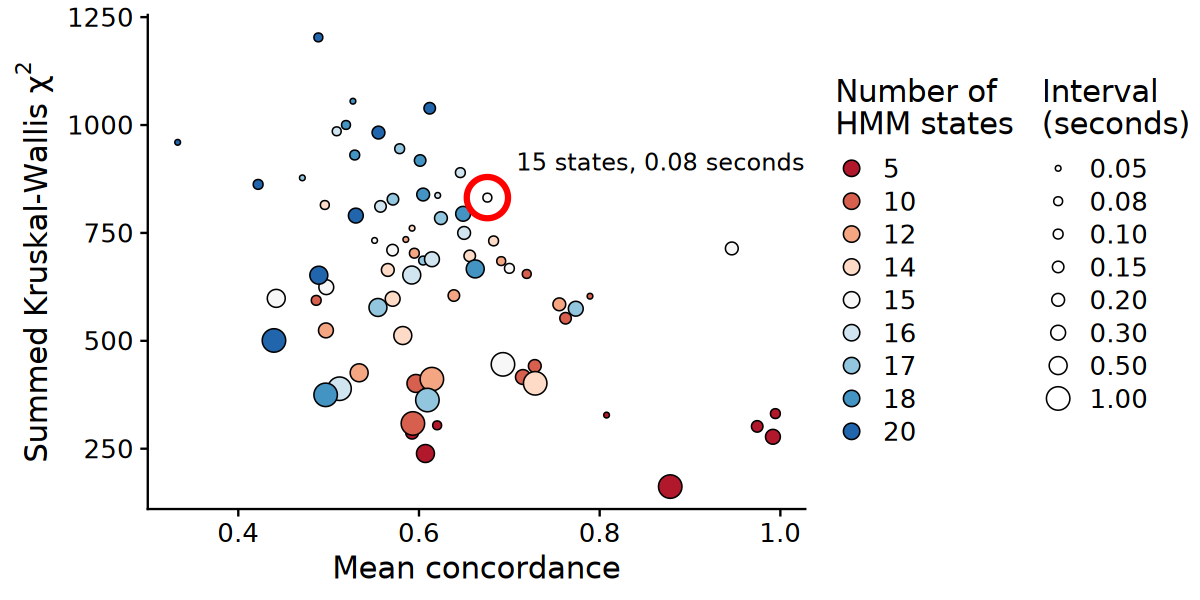

In [10]:
options(repr.plot.height = 5, repr.plot.width = 10)
p

In [11]:
ggsave("fig3.pdf", p, width = 10, height = 5)